## **Colombia education analytics**

Proyecto de ciencia de datos basado en datos abiertos del MEN (Colombia).

## **ETL  Fase 1: Inspección y comprensión del dataset**

### **1.1 Configuraciones del entorno de trabajo**

* Importamos las librerias necesarias.
* Configuramos las visualizaciones de las tablas y gráficos
* Cargamos el dataset.

In [246]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
# para m,ostrara todas las columnas en Dataframes grandes
pd.set_option('display.max_columns', None)
# para la cosnsistencia d elas gráficas
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 7)

In [248]:
# cargamos el data set
datos_men = pd.read_csv(r"..\Data\Raw\MEN_estadisticas.csv")
# Damos un primer vistazo al datset
datos_men

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5,Antioquia,1288473,94.01%,93.85%,70.28%,94.12%,75.68%,44.37%,106.81%,85.69%,117.5%,110.81%,84.06%,27.47,74.48,3.97%,3.62%,3.65%,4.57%,3.71%,93.98%,0.07%,94.56%,4.57%,93.33%,2.06%,0.07%,94.56%,2.54%,2.96%,4.25%,0.07%,4.56%,5.27%,1.68%
1,2011,8,Atlántico,523935,99.32%,99.05%,50.59%,98.93%,80.22%,50.17%,107.88%,84.19%,120.41%,107.89%,87.98%,24.42,80.46,2.76%,2.6%,3.06%,2.42%,2.61%,96.7%,0.12%,96.49%,2.42%,96.64%,0.54%,0.12%,96.49%,0.67%,0.75%,1.82%,0.12%,1.77%,2.18%,0.88%
2,2011,11,"Bogotá, D.C.",1479334,90.7%,90.29%,68.63%,86.99%,84.7%,55.01%,97.78%,82.04%,97.94%,106.48%,87.76%,26.75,94.21,3.95%,10.05%,5.3%,1.96%,2.55%,96.05%,0%,94.69%,1.96%,97.45%,0%,0%,94.69%,0%,0%,3.23%,0%,2.3%,5.11%,2.57%
3,2011,13,Bolívar,496676,91.57%,91.4%,59.74%,90.81%,67.34%,39.17%,110.41%,98.82%,126.45%,108.15%,80.64%,20.80,30.12,3.14%,1.85%,2.93%,3.79%,3.13%,94.76%,0.46%,95.48%,3.79%,93.2%,2.1%,0.46%,95.48%,2.75%,3.67%,4.43%,0.46%,4.44%,5.37%,2.28%
4,2011,15,Boyacá,300501,86.16%,86.11%,63.36%,82.5%,74.65%,49.09%,104.15%,78.87%,99.88%,119.78%,94.76%,22.77,25.26,3.07%,2.4%,2.24%,4.03%,3.51%,94.2%,0.17%,96.1%,4.03%,93.23%,2.73%,0.17%,96.1%,4.31%,3.26%,2.62%,0.17%,1.9%,4.19%,1.55%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024,91,Amazonas,23217,74.82%,74.82%,49.71%,76.87%,54.54%,26.37%,86.84%,81.03%,103.75%,81.23%,58.8%,NaN,NaN,5.11%,6.95%,2.95%,7.74%,6.2%,90.44%,0.76%,91.82%,7.74%,90.76%,4.45%,5.51%,91.82%,4.58%,3.04%,12.83%,5.51%,13.19%,15.77%,7.39%
458,2024,94,Guainía,16738,71.94%,71.94%,58.79%,72.04%,37.34%,11.28%,82.34%,88.55%,107.35%,69.65%,41.62%,NaN,NaN,4.73%,4.84%,3.87%,6.69%,3.71%,80.36%,1.47%,80.23%,6.69%,85.05%,14.91%,5.02%,80.23%,18.19%,11.24%,14.82%,5.02%,17.19%,15.55%,5.62%
459,2024,95,Guaviare,23189,74.16%,74.11%,48.68%,69.12%,59%,31.95%,87.91%,81.47%,93.86%,90.25%,71.08%,NaN,NaN,4.8%,6.83%,3.93%,6.23%,2.75%,87.14%,3.98%,89.53%,6.23%,92.11%,8.06%,6.33%,89.53%,12.32%,5.14%,11.13%,6.33%,11.08%,14.9%,3.05%
460,2024,97,Vaupés,15344,53.45%,53.45%,35.5%,51.87%,36.99%,14.24%,63.45%,55.23%,73.81%,62.71%,44.3%,NaN,NaN,5.34%,3.75%,3.74%,7.5%,7%,87.34%,0%,90.46%,7.5%,84.9%,7.32%,6.88%,90.46%,10.86%,8.1%,16%,6.88%,19.22%,15.17%,9.4%


### **1.2 Revisamos la estructura del dataset**
* Dimensiones.
* Tipos de variables.
* Rangos.

In [249]:
# revisamos la dimenension del dataset
filas, columnas = datos_men.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas")

El dataset tiene 462 filas y 37 columnas


In [250]:
# revisamos la información general del dataset
datos_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          462 non-null    int64  
 1   CÓDIGO_DEPARTAMENTO          462 non-null    int64  
 2   DEPARTAMENTO                 462 non-null    object 
 3   POBLACIÓN_5_16               462 non-null    int64  
 4   TASA_MATRICULACIÓN_5_16      462 non-null    object 
 5   COBERTURA_NETA               462 non-null    object 
 6   COBERTURA_NETA_TRANSICIÓN    462 non-null    object 
 7   COBERTURA_NETA_PRIMARIA      462 non-null    object 
 8   COBERTURA_NETA_SECUNDARIA    462 non-null    object 
 9   COBERTURA_NETA_MEDIA         462 non-null    object 
 10  COBERTURA_BRUTA              462 non-null    object 
 11  COBERTURA_BRUTA_TRANSICIÓN   462 non-null    object 
 12  COBERTURA_BRUTA_PRIMARIA     462 non-null    object 
 13  COBERTURA_BRUTA_SECU

Se pueden observar diferentes tipos de datos, como int64,  float64 y object. debemos verificar si son correctos estos tipos de datos.

In [251]:
# Descripción estadística de las variables de tipo numérico en el dataset
datos_men.describe()

,AÑO,CÓDIGO_DEPARTAMENTO,POBLACIÓN_5_16,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET
count,462.000000,462.000000,4.620000e+02,231.000000,231.000000
mean,2017.500000,52.151515,3.004250e+05,6162.284589,34.903420
std,4.035499,30.824090,3.098399e+05,11036.631798,21.374901
min,2011.000000,5.000000,1.072600e+04,13.210000,0.000000
25%,2014.000000,20.000000,8.702850e+04,22.355000,20.255000
50%,2017.500000,52.000000,2.344540e+05,26.310000,30.330000
75%,2021.000000,81.000000,3.886455e+05,54.255000,42.265000
max,2024.000000,99.000000,1.479334e+06,32237.000000,100.000000


Las varioables TAMAÑO_PROMEDIO_DE_GRUPO y SEDES_CONECTADAS_A_INTERNET parecen tener datos atípicos, mientras que la variable CÓDIGO_DEPARTAMENTO debería ser de tipo object, ya que esta variable es un ID.

In [252]:

# descripción estadística de las variables categóricas en el dataset
datos_men.describe(include=['object'])

,DEPARTAMENTO,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,462,462,462,462,462,462,462,462,462,462,462,462,462,461,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
unique,34,421,428,439,426,441,436,425,453,440,437,446,326,331,294,349,301,369,172,370,349,369,368,226,370,389,368,355,226,340,379,301
top,Antioquia,81.4%,93.43%,59.17%,92.31%,76.35%,39.77%,96.32%,99.08%,108.4%,106.3%,74.99%,4.02%,4%,1.96%,3.6%,2.07%,89.34%,0%,91.59%,3.6%,91.76%,0.01%,0%,91.59%,0%,5.48%,3.9%,0%,1.06%,2.18%,0.54%
freq,14,3,3,3,3,3,3,4,2,2,3,2,5,4,6,4,6,4,42,4,4,4,5,36,4,15,5,4,36,8,3,5


Al parecer la única variable de estas que si es de tipo object es la variable DEPARTAMENTO, el resto deben ser variables numéricas int o float. La presencia del simbolo % probablemente originó el cambio de tipo de datoa object.

#### **Tipos de datos**

Deacuerdo al dataset podemos identificar los siguientes tipos de datos presentes:
* **Variables con datos de tipo numérico** :  AÑO, CÓDIGO_DEPARTAMENTO, POBLACIÓN_5_16, TAMAÑO_PROMEDIO_DE_GRUPO, SEDES_CONECTADAS_A_INTERNET

* **Variables de tipo categórico**: DEPARTAMENTO, COBERTURA_NETA, COBERTURA_NETA_TRANSICIÓN, COBERTURA_NETA_PRIMARIA, COBERTURA_NETA_SECUNDARIA, COBERTURA_NETA_MEDIA
  COBERTURA_BRUTA, COBERTURA_BRUTA_TRANSICIÓN, COBERTURA_BRUTA_PRIMARIA, COBERTURA_BRUTA_SECUNDARIA, COBERTURA_BRUTA_MEDIA, DESERCIÓN, DESERCIÓN_TRANSICIÓN, DESERCIÓN_PRIMARIA
  DESERCIÓN_SECUNDARIA, DESERCIÓN_MEDIA, APROBACIÓN, APROBACIÓN_TRANSICIÓN, APROBACIÓN_PRIMARIA, APROBACIÓN_SECUNDARIA, APROBACIÓN_MEDIA, REPROBACIÓN, REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA
  REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA

Se puede observar que hay algunas inconsistencias con el tipo de dato de muchas de las variables, el caso más evidente es el de la variable AÑO que debería ser de tipó fecha Y CÓDIGO_DEPARTAMENTO que debería ser de tipo object. Por otra parte, las variables clasificadas en el dataset como tipo object son en realidad de tipo numérico excepto la variable DEPARTAMENTO.

Visualizaremos las primeras 5 filas y las últimas 5 filas del DataFrame, para ver de manera más explícita los datos en cada columna

In [253]:
datos_men.head()

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5,Antioquia,1288473,94.01%,93.85%,70.28%,94.12%,75.68%,44.37%,106.81%,85.69%,117.5%,110.81%,84.06%,27.47,74.48,3.97%,3.62%,3.65%,4.57%,3.71%,93.98%,0.07%,94.56%,4.57%,93.33%,2.06%,0.07%,94.56%,2.54%,2.96%,4.25%,0.07%,4.56%,5.27%,1.68%
1,2011,8,Atlántico,523935,99.32%,99.05%,50.59%,98.93%,80.22%,50.17%,107.88%,84.19%,120.41%,107.89%,87.98%,24.42,80.46,2.76%,2.6%,3.06%,2.42%,2.61%,96.7%,0.12%,96.49%,2.42%,96.64%,0.54%,0.12%,96.49%,0.67%,0.75%,1.82%,0.12%,1.77%,2.18%,0.88%
2,2011,11,"Bogotá, D.C.",1479334,90.7%,90.29%,68.63%,86.99%,84.7%,55.01%,97.78%,82.04%,97.94%,106.48%,87.76%,26.75,94.21,3.95%,10.05%,5.3%,1.96%,2.55%,96.05%,0%,94.69%,1.96%,97.45%,0%,0%,94.69%,0%,0%,3.23%,0%,2.3%,5.11%,2.57%
3,2011,13,Bolívar,496676,91.57%,91.4%,59.74%,90.81%,67.34%,39.17%,110.41%,98.82%,126.45%,108.15%,80.64%,20.80,30.12,3.14%,1.85%,2.93%,3.79%,3.13%,94.76%,0.46%,95.48%,3.79%,93.2%,2.1%,0.46%,95.48%,2.75%,3.67%,4.43%,0.46%,4.44%,5.37%,2.28%
4,2011,15,Boyacá,300501,86.16%,86.11%,63.36%,82.5%,74.65%,49.09%,104.15%,78.87%,99.88%,119.78%,94.76%,22.77,25.26,3.07%,2.4%,2.24%,4.03%,3.51%,94.2%,0.17%,96.1%,4.03%,93.23%,2.73%,0.17%,96.1%,4.31%,3.26%,2.62%,0.17%,1.9%,4.19%,1.55%


In [254]:
datos_men.tail()

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
457,2024,91,Amazonas,23217,74.82%,74.82%,49.71%,76.87%,54.54%,26.37%,86.84%,81.03%,103.75%,81.23%,58.8%,NaN,NaN,5.11%,6.95%,2.95%,7.74%,6.2%,90.44%,0.76%,91.82%,7.74%,90.76%,4.45%,5.51%,91.82%,4.58%,3.04%,12.83%,5.51%,13.19%,15.77%,7.39%
458,2024,94,Guainía,16738,71.94%,71.94%,58.79%,72.04%,37.34%,11.28%,82.34%,88.55%,107.35%,69.65%,41.62%,NaN,NaN,4.73%,4.84%,3.87%,6.69%,3.71%,80.36%,1.47%,80.23%,6.69%,85.05%,14.91%,5.02%,80.23%,18.19%,11.24%,14.82%,5.02%,17.19%,15.55%,5.62%
459,2024,95,Guaviare,23189,74.16%,74.11%,48.68%,69.12%,59%,31.95%,87.91%,81.47%,93.86%,90.25%,71.08%,NaN,NaN,4.8%,6.83%,3.93%,6.23%,2.75%,87.14%,3.98%,89.53%,6.23%,92.11%,8.06%,6.33%,89.53%,12.32%,5.14%,11.13%,6.33%,11.08%,14.9%,3.05%
460,2024,97,Vaupés,15344,53.45%,53.45%,35.5%,51.87%,36.99%,14.24%,63.45%,55.23%,73.81%,62.71%,44.3%,NaN,NaN,5.34%,3.75%,3.74%,7.5%,7%,87.34%,0%,90.46%,7.5%,84.9%,7.32%,6.88%,90.46%,10.86%,8.1%,16%,6.88%,19.22%,15.17%,9.4%
461,2024,99,Vichada,33641,68.28%,68.25%,52.78%,76.39%,30.55%,10.46%,75.93%,75.24%,111.78%,55.31%,28.65%,NaN,NaN,6.31%,4.05%,6.26%,7.53%,4.83%,80.87%,0%,77.22%,7.53%,91.16%,12.81%,0.91%,77.22%,9.77%,4.01%,17.06%,0.91%,22.17%,12.59%,4.08%


Como se observó anteriormente, la mayoría de las variables de tipo object en el dataset son en realidad vartiables numéricas, en su mayoría son variobales de tipo  float64.

Es necesario aclara que el errro en el tipo de variable se debe a la precencia del símbolo (%). De modo que, debemos eliminar dichha expresión y convtir al tipo de dato flotante.

#### **Valores faltantes o nulos**

Se puede observaar que algunas columnas como TAMAÑO_PROMEDIO_DE_GRUPO,  SEDES_CONECTADAS_A_INTERNET y DESERCIÓN_TRANSICIÓN tienen datos nulos.
Vamos a verificar el porcentaje de datos nulos por columna

In [255]:
# determinamos el porcentaje de datos nulos
nulos = datos_men.isnull().sum().sort_values(ascending=False)
porcentaje = (nulos / len(datos_men) * 100).round(2)
pd.DataFrame({'Nulos': nulos, '%': porcentaje})


,Nulos,%
TAMAÑO_PROMEDIO_DE_GRUPO,231,50.00
SEDES_CONECTADAS_A_INTERNET,231,50.00
DESERCIÓN_TRANSICIÓN,1,0.22
CÓDIGO_DEPARTAMENTO,0,0.00
AÑO,0,0.00
TASA_MATRICULACIÓN_5_16,0,0.00
POBLACIÓN_5_16,0,0.00
DEPARTAMENTO,0,0.00
COBERTURA_NETA,0,0.00
COBERTURA_NETA_MEDIA,0,0.00


El porcentaje de valores nulos de las variables TAMAÑO_PROMEDIO_DE_GRUPO y SEDES_CONECTADAS_A_INTERNET sugiere que debemos analizar estas variables con mucho cuidad con el finde determinar correctamente cuál debe ser el tratamiendo adecuado que se debe aplicar acada una de ellas. Por otra parte, la variable DESERCIÓN_TRANSICIÓN tienes valores nulos, sin embargo, estos solamente representan el 0.22 % de sus datos, lo cual no representa un gran problema.

#### **Valores duplicados y valores únicos**

Vamos a determinar si existen filas duplicadas y también encontrarem,os los valores únicos en cad columna con sus respectivas frecuencias

In [256]:
# identificamos filas duplicadas
duplicados = datos_men[datos_men.duplicated()]
duplicados.shape
print(f"El número de filas duplicadas es: {duplicados.shape[0]}")

El número de filas duplicadas es: 0


El análisis de duplicados mostró 0 filas repetidas, confirmando que cada registro es único. Esto facilita etapas posteriores de análisis y modelado, aunque se recomienda verificar consistencia en campos clave.

In [290]:
# contamos los valores únicos por variable
def contar_valores_unicos(df):
    for col in datos_men.columns:
        print(f"{col} : {datos_men[col].nunique()}")
print(f"Variable - valores uínicos")
contar_valores_unicos(datos_men)

Variable - valores uínicos
AÑO : 14
DEPARTAMENTO : 33
POBLACIÓN_5_16 : 461
TASA_MATRICULACIÓN_5_16 : 421
COBERTURA_NETA : 428
COBERTURA_NETA_TRANSICIÓN : 439
COBERTURA_NETA_PRIMARIA : 426
COBERTURA_NETA_SECUNDARIA : 441
COBERTURA_NETA_MEDIA : 436
COBERTURA_BRUTA : 425
COBERTURA_BRUTA_TRANSICIÓN : 453
COBERTURA_BRUTA_PRIMARIA : 440
COBERTURA_BRUTA_SECUNDARIA : 437
COBERTURA_BRUTA_MEDIA : 446
DESERCIÓN : 326
DESERCIÓN_TRANSICIÓN : 331
DESERCIÓN_PRIMARIA : 294
DESERCIÓN_SECUNDARIA : 349
DESERCIÓN_MEDIA : 301
APROBACIÓN : 369
APROBACIÓN_TRANSICIÓN : 172
APROBACIÓN_PRIMARIA : 370
APROBACIÓN_SECUNDARIA : 349
APROBACIÓN_MEDIA : 369
REPROBACIÓN : 368
REPROBACIÓN_TRANSICIÓN : 226
REPROBACIÓN_PRIMARIA : 370
REPROBACIÓN_SECUNDARIA : 389
REPROBACIÓN_MEDIA : 368
REPITENCIA : 355
REPITENCIA_TRANSICIÓN : 226
REPITENCIA_PRIMARIA : 340
REPITENCIA_SECUNDARIA : 379
REPITENCIA_MEDIA : 301


El análisis de valores únicos revela un dataset con alta variabilidad y granularidad, donde la mayoría de las mediciones muestran diferencias significativas entre observaciones, permitiendo análisis detallados pero requiriendo manejo adecuado para evitar problemas estadísticos por la alta dimensionalidad implícita

### **1.3 Exploración visual**

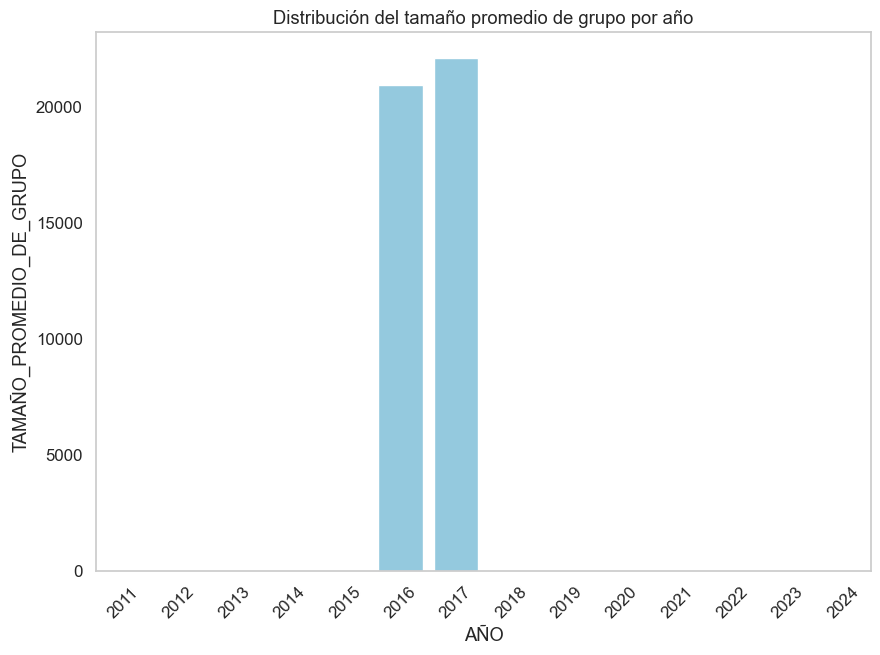

In [258]:
sns.barplot(data=datos_men,x = "AÑO", y = "TAMAÑO_PROMEDIO_DE_GRUPO", errorbar=None, color="skyblue")
plt.title("Distribución del tamaño promedio de grupo por año")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Sólo se tiene información para dos años, 2016 y 2017, esto reprsenta un problemam al momento de analizar la distribución del tamaño promedio del grupo por año, ya que no se pueden extraer concluciones a partir de esta información.

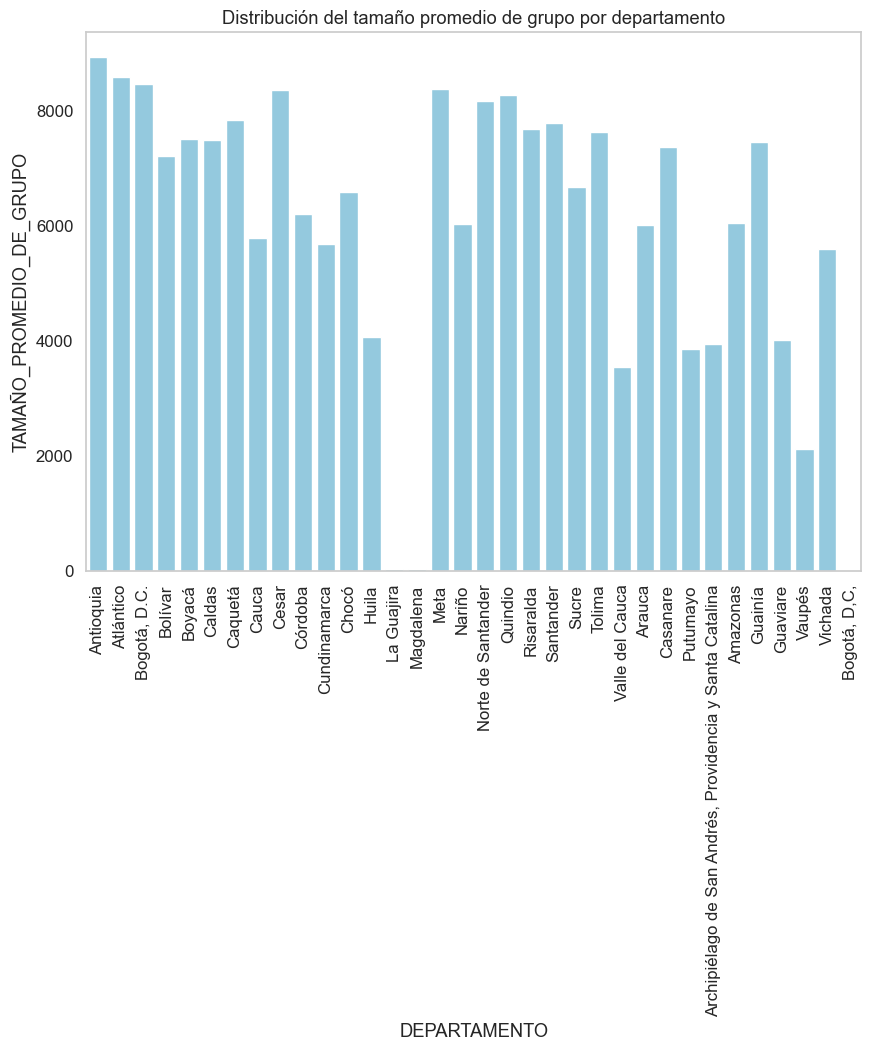

In [259]:
sns.barplot(data=datos_men,x = "DEPARTAMENTO", y = "TAMAÑO_PROMEDIO_DE_GRUPO", errorbar=None, color="skyblue")
plt.title("Distribución del tamaño promedio de grupo por departamento")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

para dos departamentos no se tiene información acerca del tamaño promedio del grupo, peobablemente se deba a que la información no fue suministrada por las entidades encargadas o no fue registrada por los recolectores de esta información, en cualquier caso, supone un p´rroblema al momento de sacar conclusiones.

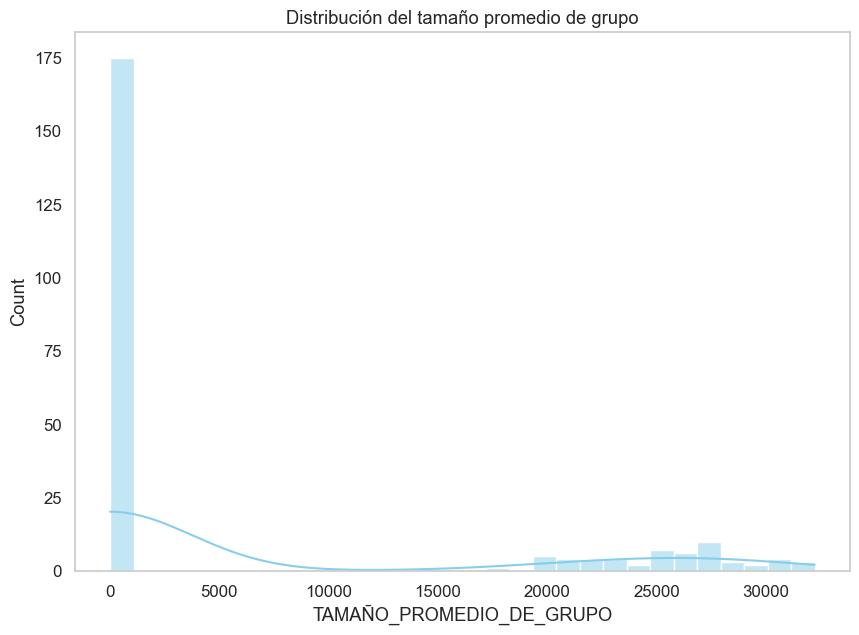

In [260]:
sns.histplot(data=datos_men, x="TAMAÑO_PROMEDIO_DE_GRUPO", bins=30, kde=True, color="skyblue")
plt.title("Distribución del tamaño promedio de grupo")
plt.grid(False)
plt.show()

Podemos ver que hay ***fuerte asimetría*** hacia la derecha, con muchos ***valores atípicos***, lo cual genera una gran ***variabilidad*** en los datos. Se puede considerer eliminar esta variable.

#### **Análisis de valores atípicos**

In [261]:
datos_men["TAMAÑO_PROMEDIO_DE_GRUPO"].describe()

count      231.000000
mean      6162.284589
std      11036.631798
min         13.210000
25%         22.355000
50%         26.310000
75%         54.255000
max      32237.000000
Name: TAMAÑO_PROMEDIO_DE_GRUPO, dtype: float64

La ***desviación estándar*** de **11036.631798** respecto a la ***media*** de **6162.284589** reafirma la variabilidad observada anteriormente

In [262]:
# Identificar outliers usando IQR
Q1 = datos_men['TAMAÑO_PROMEDIO_DE_GRUPO'].quantile(0.25)
Q3 = datos_men['TAMAÑO_PROMEDIO_DE_GRUPO'].quantile(0.75)
IQR = Q3 - Q1
outliers = datos_men['TAMAÑO_PROMEDIO_DE_GRUPO'][(datos_men['TAMAÑO_PROMEDIO_DE_GRUPO'] < Q1 - 1.5*IQR) | (datos_men['TAMAÑO_PROMEDIO_DE_GRUPO'] > Q3 + 1.5*IQR)].tolist()
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Valores atípicos (outliers): {outliers}")
print(f"Número de outliers: {len(outliers)}")

Rango intercuartílico (IQR): 31.899999999999995
Valores atípicos (outliers): [30588.0, 27781.0, 27281.0, 24543.0, 24765.0, 25336.0, 26515.0, 20246.0, 27664.0, 21791.0, 19579.0, 22587.0, 27421.0, 21151.0, 26773.0, 27934.0, 25753.0, 24887.0, 23034.0, 25322.0, 24647.0, 20236.0, 24825.0, 26859.0, 21218.0, 26299.0, 27866.0, 17248.0, 31728.0, 32237.0, 31843.0, 25846.0, 27697.0, 26938.0, 28152.0, 20127.0, 30738.0, 21514.0, 20136.0, 23395.0, 28256.0, 31086.0, 20998.0, 30323.0, 29872.0, 27947.0, 29433.0, 23538.0, 27924.0, 21767.0, 26656.0, 27407.0, 20971.0, 25747.0, 14709.0, 21875.0]
Número de outliers: 56


Se puede observar que variable TAMAÑO_PROMEDIO_DE_GRUPO solamente tiene informaci´n respecto a dos de los catorce años registrados en el dataset (2016 y 2027). También se puede observar que no tiene información respecto a tres de los departamentos. Adicionalmente, se puedo estudiar la distribición de los datos de esta variable, lo cual deja en evidencia una fuerte asuimetría, debido a la presencia de outliers, los cuales parecen errores de recolección de la información , probablemente la escala de los datos.

Por todo lo anterior, es aconsejable, eliminar esta columna, puesto que imputar con algún valor podría agregar sesgo al momento de hacer un estudio más profundo.

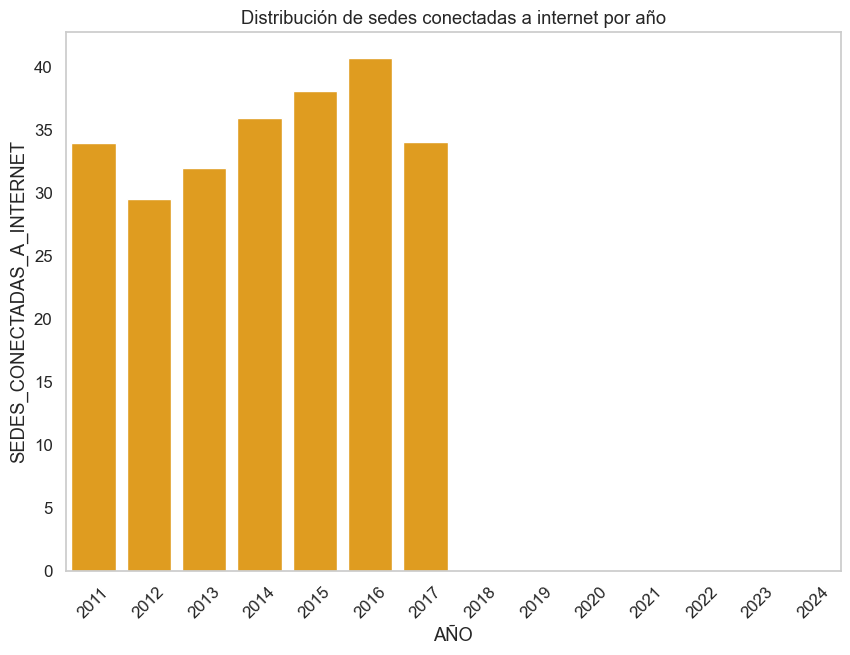

In [263]:
sns.barplot(data=datos_men,x = "AÑO", y = "SEDES_CONECTADAS_A_INTERNET", errorbar=None, color="orange")
plt.title("Distribución de sedes conectadas a internet por año")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Se puede observar que solo hay información para la mitad de los años considerados en el dataset, no se tiene información para el periodo comprendido entre 2018 y 2024, lo cual dificukltará el estudio de la influencia de internet tanto para directivos, maestro y estudiantes en las instituciones.

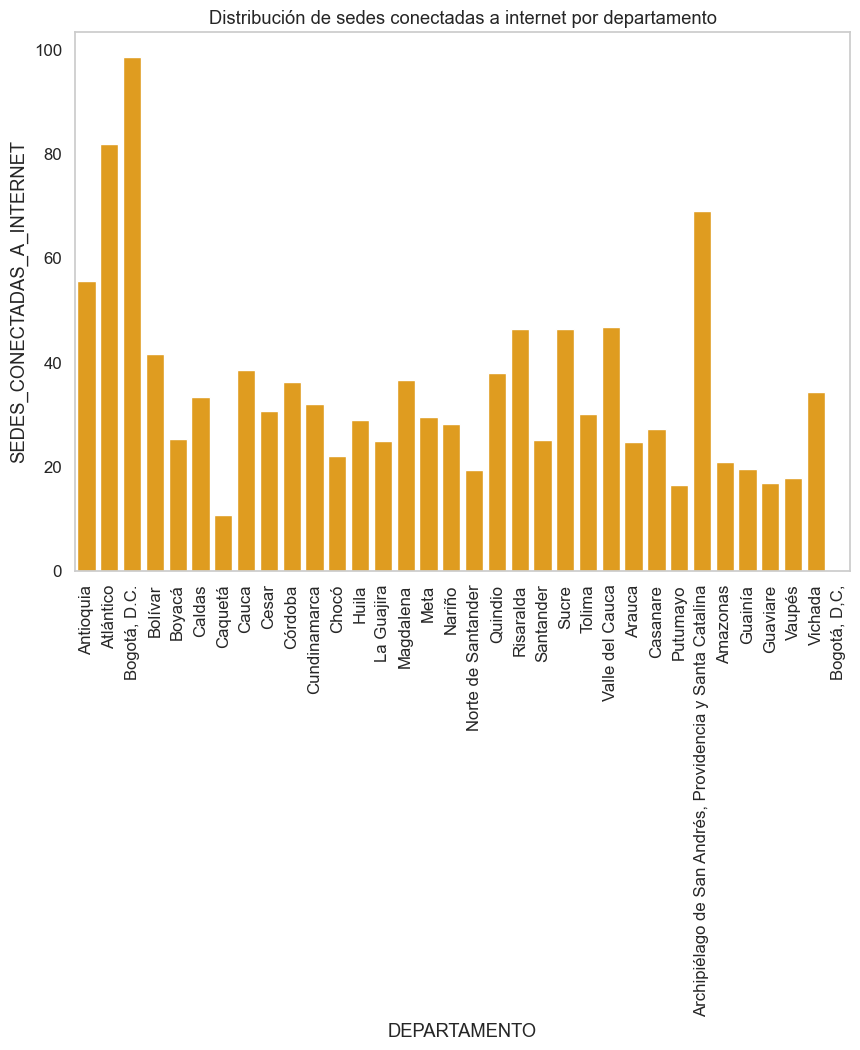

In [264]:
sns.barplot(data=datos_men,x = "DEPARTAMENTO", y = "SEDES_CONECTADAS_A_INTERNET", errorbar=None, color="orange")
plt.title("Distribución de sedes conectadas a internet por departamento")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

A primera vista, se observa que los principales sdepartamentos del país, son aquellas con mayor conectividad a internet, con algunos casos curiosos como el archiprielago de San André con una gran conectividad. Tambié llama la atención el los casos del valle del cauca y antioquía con una conectividad aperebtemente baja, respecto a la importacia de estos departamentos. Sim embaro, hay que tener en cuanta que falta el 50% de la infortmación. Lo cual dificulta extraer conclusiones a simple vista.

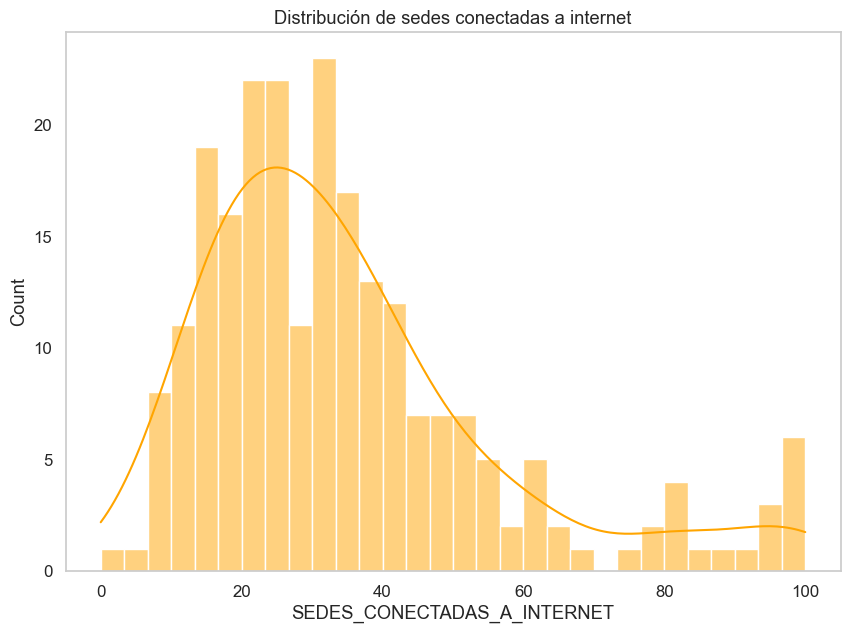

In [265]:
sns.histplot(data=datos_men, x="SEDES_CONECTADAS_A_INTERNET", bins=30, kde=True,color="orange")
plt.title("Distribución de sedes conectadas a internet")
plt.grid(False)
plt.show()

la diustrubución de la conectividad a internet por departamentos, tiede a una ***distribución normal*** con ***asimetría hacia la derecha***, lo cual indica la prersencia de valores atípicos.

#### **Análisis de valores atípicos**

In [266]:
datos_men["SEDES_CONECTADAS_A_INTERNET"].describe()

count    231.000000
mean      34.903420
std       21.374901
min        0.000000
25%       20.255000
50%       30.330000
75%       42.265000
max      100.000000
Name: SEDES_CONECTADAS_A_INTERNET, dtype: float64

Se puede observar una gran ****variabilidad*** de los datos, puesto que la ***desviación estándar*** de ***21.374901*** es muy grande respecto a su media de  ***34.903420***

In [267]:
# Identificar outliers usando IQR
Q1 = datos_men['SEDES_CONECTADAS_A_INTERNET'].quantile(0.25)
Q3 = datos_men['SEDES_CONECTADAS_A_INTERNET'].quantile(0.75)
IQR = Q3 - Q1
outliers = datos_men['SEDES_CONECTADAS_A_INTERNET'][(datos_men['SEDES_CONECTADAS_A_INTERNET'] < Q1 - 1.5*IQR) | (datos_men['SEDES_CONECTADAS_A_INTERNET'] > Q3 + 1.5*IQR)].tolist()
print(f"Rango intercuartílico (IQR): {IQR}")
print(f"Valores atípicos (outliers): {outliers}")
print(f"Número de outliers: {len(outliers)}")

Rango intercuartílico (IQR): 22.01
Valores atípicos (outliers): [80.46, 94.21, 100.0, 84.94, 99.86, 80.0, 80.87, 99.44, 96.0, 88.0, 98.87, 83.33, 95.39, 97.65, 79.17, 92.5, 98.76, 79.17]
Número de outliers: 18


En este caso los datos de la varible SEDES_CONECTADAS_A_INTERNET solamente prsentan información acerca de la mitad de los años de todo el conjunto d edatos. Además, los datos presentan una desviación(21.374901) muy grande respecto a la media (34.903420) y dado que  50% son nulos, es preferible elimibnar esta variable para no incluir sesgos en el dataset.

Para la variable DESERCIÓN_TRANSICIÓN, dado que los datos nulos o faltantes corresponde solamente al 0.22 % de los datos de la columna, se pueden inputar haciendo uso de la mediana, ya que no es sensible a la deviación estándar y representa mayor consistencia.

Es recomendable, cambiar el tipo de datos de las variables para poder buscar correlaciones entre ellas y asi poder determinar la existencia de colinealidad, y luego poder reducir la variabilidad.

### **1.4 Transformación de datos**

In [268]:
variables =['TASA_MATRICULACIÓN_5_16','COBERTURA_NETA','COBERTURA_NETA_TRANSICIÓN','COBERTURA_NETA_PRIMARIA','COBERTURA_NETA_SECUNDARIA','COBERTURA_NETA_MEDIA',
                        'COBERTURA_BRUTA','COBERTURA_BRUTA_TRANSICIÓN','COBERTURA_BRUTA_PRIMARIA','COBERTURA_BRUTA_SECUNDARIA','COBERTURA_BRUTA_MEDIA','DESERCIÓN','DESERCIÓN_TRANSICIÓN',
                        'DESERCIÓN_PRIMARIA','DESERCIÓN_SECUNDARIA','DESERCIÓN_MEDIA','APROBACIÓN','APROBACIÓN_TRANSICIÓN','APROBACIÓN_PRIMARIA','APROBACIÓN_SECUNDARIA','APROBACIÓN_MEDIA',
                        'REPROBACIÓN','REPROBACIÓN_TRANSICIÓN','REPROBACIÓN_PRIMARIA','REPROBACIÓN_SECUNDARIA','REPROBACIÓN_MEDIA','REPITENCIA','REPITENCIA_TRANSICIÓN','REPITENCIA_PRIMARIA',
                        'REPITENCIA_SECUNDARIA','REPITENCIA_MEDIA']

In [269]:
def limpiar_porcentajes(df, columnas):
    for col in columnas:
        df[col] = (df[col].str.replace('%', '', regex=False).astype(float) / 100)
    return df

limpiar_porcentajes(datos_men,variables)

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5,Antioquia,1288473,0.9401,0.9385,0.7028,0.9412,0.7568,0.4437,1.0681,0.8569,1.1750,1.1081,0.8406,27.47,74.48,0.0397,0.0362,0.0365,0.0457,0.0371,0.9398,0.0007,0.9456,0.0457,0.9333,0.0206,0.0007,0.9456,0.0254,0.0296,0.0425,0.0007,0.0456,0.0527,0.0168
1,2011,8,Atlántico,523935,0.9932,0.9905,0.5059,0.9893,0.8022,0.5017,1.0788,0.8419,1.2041,1.0789,0.8798,24.42,80.46,0.0276,0.0260,0.0306,0.0242,0.0261,0.9670,0.0012,0.9649,0.0242,0.9664,0.0054,0.0012,0.9649,0.0067,0.0075,0.0182,0.0012,0.0177,0.0218,0.0088
2,2011,11,"Bogotá, D.C.",1479334,0.9070,0.9029,0.6863,0.8699,0.8470,0.5501,0.9778,0.8204,0.9794,1.0648,0.8776,26.75,94.21,0.0395,0.1005,0.0530,0.0196,0.0255,0.9605,0.0000,0.9469,0.0196,0.9745,0.0000,0.0000,0.9469,0.0000,0.0000,0.0323,0.0000,0.0230,0.0511,0.0257
3,2011,13,Bolívar,496676,0.9157,0.9140,0.5974,0.9081,0.6734,0.3917,1.1041,0.9882,1.2645,1.0815,0.8064,20.80,30.12,0.0314,0.0185,0.0293,0.0379,0.0313,0.9476,0.0046,0.9548,0.0379,0.9320,0.0210,0.0046,0.9548,0.0275,0.0367,0.0443,0.0046,0.0444,0.0537,0.0228
4,2011,15,Boyacá,300501,0.8616,0.8611,0.6336,0.8250,0.7465,0.4909,1.0415,0.7887,0.9988,1.1978,0.9476,22.77,25.26,0.0307,0.0240,0.0224,0.0403,0.0351,0.9420,0.0017,0.9610,0.0403,0.9323,0.0273,0.0017,0.9610,0.0431,0.0326,0.0262,0.0017,0.0190,0.0419,0.0155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024,91,Amazonas,23217,0.7482,0.7482,0.4971,0.7687,0.5454,0.2637,0.8684,0.8103,1.0375,0.8123,0.5880,NaN,NaN,0.0511,0.0695,0.0295,0.0774,0.0620,0.9044,0.0076,0.9182,0.0774,0.9076,0.0445,0.0551,0.9182,0.0458,0.0304,0.1283,0.0551,0.1319,0.1577,0.0739
458,2024,94,Guainía,16738,0.7194,0.7194,0.5879,0.7204,0.3734,0.1128,0.8234,0.8855,1.0735,0.6965,0.4162,NaN,NaN,0.0473,0.0484,0.0387,0.0669,0.0371,0.8036,0.0147,0.8023,0.0669,0.8505,0.1491,0.0502,0.8023,0.1819,0.1124,0.1482,0.0502,0.1719,0.1555,0.0562
459,2024,95,Guaviare,23189,0.7416,0.7411,0.4868,0.6912,0.5900,0.3195,0.8791,0.8147,0.9386,0.9025,0.7108,NaN,NaN,0.0480,0.0683,0.0393,0.0623,0.0275,0.8714,0.0398,0.8953,0.0623,0.9211,0.0806,0.0633,0.8953,0.1232,0.0514,0.1113,0.0633,0.1108,0.1490,0.0305
460,2024,97,Vaupés,15344,0.5345,0.5345,0.3550,0.5187,0.3699,0.1424,0.6345,0.5523,0.7381,0.6271,0.4430,NaN,NaN,0.0534,0.0375,0.0374,0.0750,0.0700,0.8734,0.0000,0.9046,0.0750,0.8490,0.0732,0.0688,0.9046,0.1086,0.0810,0.1600,0.0688,0.1922,0.1517,0.0940


Verifiquemos nuevamente el tipo de datos

In [270]:
datos_men[variables].dtypes

TASA_MATRICULACIÓN_5_16       float64
COBERTURA_NETA                float64
COBERTURA_NETA_TRANSICIÓN     float64
COBERTURA_NETA_PRIMARIA       float64
COBERTURA_NETA_SECUNDARIA     float64
COBERTURA_NETA_MEDIA          float64
COBERTURA_BRUTA               float64
COBERTURA_BRUTA_TRANSICIÓN    float64
COBERTURA_BRUTA_PRIMARIA      float64
COBERTURA_BRUTA_SECUNDARIA    float64
COBERTURA_BRUTA_MEDIA         float64
DESERCIÓN                     float64
DESERCIÓN_TRANSICIÓN          float64
DESERCIÓN_PRIMARIA            float64
DESERCIÓN_SECUNDARIA          float64
DESERCIÓN_MEDIA               float64
APROBACIÓN                    float64
APROBACIÓN_TRANSICIÓN         float64
APROBACIÓN_PRIMARIA           float64
APROBACIÓN_SECUNDARIA         float64
APROBACIÓN_MEDIA              float64
REPROBACIÓN                   float64
REPROBACIÓN_TRANSICIÓN        float64
REPROBACIÓN_PRIMARIA          float64
REPROBACIÓN_SECUNDARIA        float64
REPROBACIÓN_MEDIA             float64
REPITENCIA  

Los datos se cambiaron correctamente al tipo de dato adecuado.

In [271]:
datos_men[variables].describe()

,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,461.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.855312,0.858476,0.576324,0.841464,0.682766,0.386629,0.981078,0.895162,1.074988,0.992494,0.760696,0.040669,0.041210,0.034225,0.051041,0.037379,0.900461,0.008292,0.915631,0.051041,0.910409,0.058921,0.014742,0.915631,0.082819,0.052250,0.043143,0.014742,0.042035,0.056133,0.022580
std,0.104072,0.104683,0.115335,0.099830,0.152904,0.128135,0.113082,0.168951,0.127103,0.155666,0.169777,0.017360,0.020927,0.016246,0.022433,0.022039,0.044878,0.015501,0.046752,0.022433,0.039952,0.036332,0.023848,0.046752,0.047095,0.028427,0.034294,0.023848,0.038497,0.041277,0.017690
min,0.523300,0.507900,0.192200,0.511200,0.240600,0.067900,0.597900,0.320300,0.720500,0.437700,0.239200,0.004600,0.002900,0.003400,0.003800,0.004200,0.720000,0.000000,0.707200,0.003800,0.626300,0.000000,0.000000,0.707200,0.000000,0.000000,0.001000,0.000000,0.000600,0.001100,0.000000
25%,0.799250,0.806075,0.513000,0.784175,0.608950,0.304500,0.931675,0.810325,1.004675,0.941100,0.685400,0.028900,0.028300,0.022725,0.035300,0.025125,0.880000,0.001700,0.902425,0.035300,0.892375,0.032600,0.002125,0.902425,0.044625,0.033200,0.016050,0.002125,0.013500,0.020675,0.008925
50%,0.874350,0.881900,0.588000,0.862000,0.727100,0.412000,1.002200,0.895050,1.074600,1.029650,0.801650,0.038500,0.038300,0.031500,0.047550,0.032850,0.900950,0.004000,0.921200,0.047550,0.913250,0.061500,0.005800,0.921200,0.091800,0.053250,0.032300,0.005800,0.029400,0.042650,0.016850
75%,0.934450,0.934300,0.661475,0.913325,0.788125,0.480900,1.054875,0.974525,1.148525,1.099975,0.873875,0.048875,0.052300,0.041875,0.063825,0.043075,0.930175,0.008200,0.944500,0.063825,0.933750,0.076675,0.015900,0.944500,0.114800,0.066675,0.064050,0.015900,0.060675,0.087025,0.034900
max,1.039400,1.038800,0.882800,1.027600,0.910900,0.653200,1.230400,1.449700,1.508400,1.262300,1.073000,0.109400,0.208400,0.107300,0.131800,0.298900,0.990800,0.131300,0.990600,0.131800,0.994900,0.193200,0.170100,0.990600,0.245700,0.179100,0.173700,0.170100,0.227700,0.252200,0.163900


Convertimos la variable año a formato de fecha, esto permitirá trabajar mejor con tendencias de temporales.

In [272]:
# Año año como tipo fecha
datos_men["AÑO"] = datos_men["AÑO"].astype(str).astype("period[Y]")
datos_men["AÑO"].unique()

<PeriodArray>
['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
 '2020', '2021', '2022', '2023', '2024']
Length: 14, dtype: period[Y-DEC]

Imputamos con la mediana a la variable DESERCIÓN_TRANSICIÓN, ya que solamente hay un 0.22 %  de datos nulos o faltantes, y la mediana es una medida robusta que no se deja influenciar por los valor atípicos presentes.

In [273]:

datos_men["DESERCIÓN_TRANSICIÓN"] = datos_men["DESERCIÓN_TRANSICIÓN"].fillna(datos_men["DESERCIÓN_TRANSICIÓN"].median())
datos_men["DESERCIÓN_TRANSICIÓN"].isnull().sum()

np.int64(0)

ya no hay datos nulos en la variable DESERCIÓN_TRANSICIÓN"

veamos como es la distribución d eestos datos específicamente

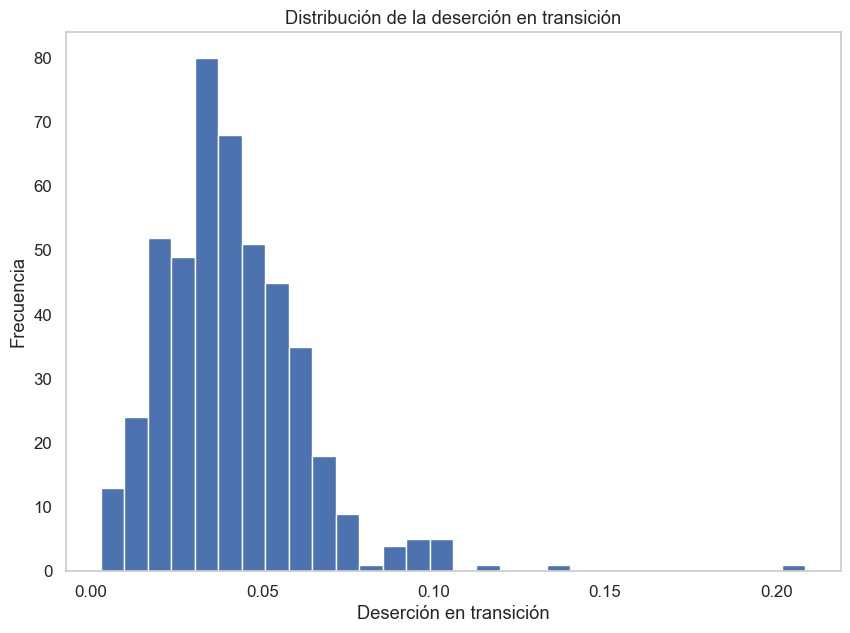

In [274]:
datos_men["DESERCIÓN_TRANSICIÓN"].hist(bins=30)
plt.title("Distribución de la deserción en transición")
plt.xlabel("Deserción en transición")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

La deserción de transisción presenta una distribución normal con algunos valores atípicos, se debe estudiar en qué deparatmentos ocurre la mayor cantidad de deserción y tratar de enterder sus posibles causas, desde el abandono de la políticas  de estado, o por presencioa del conflicto armado.

Eliminnaremos la variables TAMAÑO_PROMEDIO_DE_GRUPO, SEDES_CONECTADAS_A_INTERNET por las razones anteriormente explicadas y también eleiminaresmos la variable CÓDIGO_DEPARTAMENTO debido que considereamo no es encesaria para el estudio.

In [275]:
# verificamos nuevamente las dimensiones del dataset
datos_men.shape

(462, 37)

el dataset tiene 462 filas y 37 columnas

In [276]:
# eliminamos columnas que no aportan al análisis
datos_men = datos_men.drop(columns=["CÓDIGO_DEPARTAMENTO", "TAMAÑO_PROMEDIO_DE_GRUPO","SEDES_CONECTADAS_A_INTERNET"])
datos_men.shape

(462, 34)

Ahora, el dataset tiene 462 filas y 34 columnas, se eliminaron las columnas que podrían llevar a conclusiones erroneso sesgadas

In [277]:
datos_men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype        
---  ------                      --------------  -----        
 0   AÑO                         462 non-null    period[Y-DEC]
 1   DEPARTAMENTO                462 non-null    object       
 2   POBLACIÓN_5_16              462 non-null    int64        
 3   TASA_MATRICULACIÓN_5_16     462 non-null    float64      
 4   COBERTURA_NETA              462 non-null    float64      
 5   COBERTURA_NETA_TRANSICIÓN   462 non-null    float64      
 6   COBERTURA_NETA_PRIMARIA     462 non-null    float64      
 7   COBERTURA_NETA_SECUNDARIA   462 non-null    float64      
 8   COBERTURA_NETA_MEDIA        462 non-null    float64      
 9   COBERTURA_BRUTA             462 non-null    float64      
 10  COBERTURA_BRUTA_TRANSICIÓN  462 non-null    float64      
 11  COBERTURA_BRUTA_PRIMARIA    462 non-null    float64      
 12  COBERTUR

vamos areglar los nombres, puesto que haproblemas con algunos nombres como por ejemplo Bogotá, D.C. y v representan lo mismo, Archipiélago de San Andrés, Providencia y Santa Catalina (muy largo) y 

In [278]:
datos_men["DEPARTAMENTO"].unique()

array(['Antioquia', 'Atlántico', 'Bogotá, D.C.', 'Bolívar', 'Boyacá',
       'Caldas', 'Caquetá', 'Cauca', 'Cesar', 'Córdoba', 'Cundinamarca',
       'Chocó', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Quindio', 'Risaralda', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Arauca', 'Casanare', 'Putumayo',
       'Archipiélago de San Andrés, Providencia y Santa Catalina',
       'Amazonas', 'Guainía', 'Guaviare', 'Vaupés', 'Vichada',
       'Bogotá, D,C,'], dtype=object)

In [279]:
# Define el mapeo completo
mapeo_departamentos = {
    'Bogotá, D.C.': 'Bogotá D.C.',
    'Bogotá, D,C,': 'Bogotá D.C.',
    'Archipiélago de San Andrés, Providencia y Santa Catalina': 'San Andrés',
    'Quindio': 'Quindío'
}

# Aplica el mapeo, manteniendo los valores que no están en el diccionario
datos_men["DEPARTAMENTO"] = datos_men["DEPARTAMENTO"].map(mapeo_departamentos).fillna(datos_men["DEPARTAMENTO"])

In [280]:
datos_men["DEPARTAMENTO"].unique()

array(['Antioquia', 'Atlántico', 'Bogotá D.C.', 'Bolívar', 'Boyacá',
       'Caldas', 'Caquetá', 'Cauca', 'Cesar', 'Córdoba', 'Cundinamarca',
       'Chocó', 'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Nariño',
       'Norte de Santander', 'Quindío', 'Risaralda', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca', 'Arauca', 'Casanare', 'Putumayo',
       'San Andrés', 'Amazonas', 'Guainía', 'Guaviare', 'Vaupés',
       'Vichada'], dtype=object)

### **1.5 Revisión de la integridad de los datos**

In [281]:
# revisamos el dataset
datos_men.head()

,AÑO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,Antioquia,1288473,0.9401,0.9385,0.7028,0.9412,0.7568,0.4437,1.0681,0.8569,1.1750,1.1081,0.8406,0.0397,0.0362,0.0365,0.0457,0.0371,0.9398,0.0007,0.9456,0.0457,0.9333,0.0206,0.0007,0.9456,0.0254,0.0296,0.0425,0.0007,0.0456,0.0527,0.0168
1,2011,Atlántico,523935,0.9932,0.9905,0.5059,0.9893,0.8022,0.5017,1.0788,0.8419,1.2041,1.0789,0.8798,0.0276,0.0260,0.0306,0.0242,0.0261,0.9670,0.0012,0.9649,0.0242,0.9664,0.0054,0.0012,0.9649,0.0067,0.0075,0.0182,0.0012,0.0177,0.0218,0.0088
2,2011,Bogotá D.C.,1479334,0.9070,0.9029,0.6863,0.8699,0.8470,0.5501,0.9778,0.8204,0.9794,1.0648,0.8776,0.0395,0.1005,0.0530,0.0196,0.0255,0.9605,0.0000,0.9469,0.0196,0.9745,0.0000,0.0000,0.9469,0.0000,0.0000,0.0323,0.0000,0.0230,0.0511,0.0257
3,2011,Bolívar,496676,0.9157,0.9140,0.5974,0.9081,0.6734,0.3917,1.1041,0.9882,1.2645,1.0815,0.8064,0.0314,0.0185,0.0293,0.0379,0.0313,0.9476,0.0046,0.9548,0.0379,0.9320,0.0210,0.0046,0.9548,0.0275,0.0367,0.0443,0.0046,0.0444,0.0537,0.0228
4,2011,Boyacá,300501,0.8616,0.8611,0.6336,0.8250,0.7465,0.4909,1.0415,0.7887,0.9988,1.1978,0.9476,0.0307,0.0240,0.0224,0.0403,0.0351,0.9420,0.0017,0.9610,0.0403,0.9323,0.0273,0.0017,0.9610,0.0431,0.0326,0.0262,0.0017,0.0190,0.0419,0.0155


In [283]:
columas , filas = datos_men.shape
print(f"El dataset final tiene {filas} filas y {columas} columnas")

El dataset final tiene 34 filas y 462 columnas


In [288]:
#verificamos el tipo de dato
datos_men.dtypes

AÑO                           period[Y-DEC]
DEPARTAMENTO                         object
POBLACIÓN_5_16                        int64
TASA_MATRICULACIÓN_5_16             float64
COBERTURA_NETA                      float64
COBERTURA_NETA_TRANSICIÓN           float64
COBERTURA_NETA_PRIMARIA             float64
COBERTURA_NETA_SECUNDARIA           float64
COBERTURA_NETA_MEDIA                float64
COBERTURA_BRUTA                     float64
COBERTURA_BRUTA_TRANSICIÓN          float64
COBERTURA_BRUTA_PRIMARIA            float64
COBERTURA_BRUTA_SECUNDARIA          float64
COBERTURA_BRUTA_MEDIA               float64
DESERCIÓN                           float64
DESERCIÓN_TRANSICIÓN                float64
DESERCIÓN_PRIMARIA                  float64
DESERCIÓN_SECUNDARIA                float64
DESERCIÓN_MEDIA                     float64
APROBACIÓN                          float64
APROBACIÓN_TRANSICIÓN               float64
APROBACIÓN_PRIMARIA                 float64
APROBACIÓN_SECUNDARIA           

In [285]:
print(f"cantidad de valores nulos: {datos_men.isnull().sum().sum()}")
print(f"Filass duplicadas: {datos_men.duplicated().sum()}")

cantidad de valores nulos: 0
Filass duplicadas: 0


Podenmos observar que los datos han sido limpiados y tratados con exito, de modo que se pueden exportar a un nuevio datset, con el fin de poder continuar con el proceso de anpálisis de patrones entre variables para aplicación de modelos predictivos o de clasificación.

In [289]:
datos_men.to_csv(r"..\Data\Processed\MEN_estadisticas_limpio.csv", index=False) 